### 데이터 불러오기

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = ['Malgun Gothic']
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
menu_df = pd.read_csv('data/csv_output/1데이터_메뉴.csv')
employee_df = pd.read_csv('data/csv_output/2데이터_직원.csv')
supplier_df = pd.read_csv('data/csv_output/3데이터_공급업체.csv')
purchase_df = pd.read_csv('data/csv_output/4데이터_구매이력.csv')
review_df = pd.read_csv('data/csv_output/5데이터_리뷰.csv')

print("Bella Roma 레스토랑 데이터 분석")
print("=" * 60)

Bella Roma 레스토랑 데이터 분석


In [17]:
menu_df

,메뉴명,카테고리,가격,재료,알레르기 정보
0,마르게리타 피자,피자,15000,"밀가루, 토마토, 치즈, 바질","글루텐, 유제품 포함"
1,까르보나라 파스타,파스타,18000,"파스타면, 베이컨, 계란, 치즈","글루텐, 계란, 유제품"
2,티라미수,디저트,8000,"마스카포네, 에스프레소, 코코아","유제품, 카페인"
3,아메리카노,음료,5000,"원두, 물",카페인 포함


In [18]:
employee_df

,이름,역할,근무 요일,경력
0,김철수,주방장(Head Chef),월~금,15년
1,이영희,매니저,월~토,10년
2,박민수,서버,화~일,2년
3,안다혜,바리스타,월~금,3년


In [19]:
supplier_df

,공급업체명,품목,연락처
0,신촌 농산물 유통센터,"채소, 바질",02-222-3333
1,이탈리아 직수입상,올리브오일,070-9876-5432
2,한국 낙농 협회,"치즈, 우유",02-555-1212


In [20]:
purchase_df

,User,MenuItem,Quantity,PricePerUnit,TotalPrice,Date
0,사용자1,티라미수,1,8000,8000,2024-03-04
1,사용자1,티라미수,3,8000,24000,2024-11-25
2,사용자1,까르보나라 파스타,3,18000,54000,2024-04-16
3,사용자1,아메리카노,1,5000,5000,2024-11-29
4,사용자1,티라미수,1,8000,8000,2024-06-23
...,...,...,...,...,...,...
477,사용자50,까르보나라 파스타,3,18000,54000,2024-09-06
478,사용자50,까르보나라 파스타,2,18000,36000,2024-01-24
479,사용자50,티라미수,3,8000,24000,2024-07-18
480,사용자50,아메리카노,3,5000,15000,2024-12-14


In [21]:
review_df

,Rating,Review,User,Date
0,4,분위기가 좋아서 데이트 장소로 딱입니다.,사용자17,2024-01-05
1,4,티라미수가 정말 부드럽고 맛있어요.,사용자27,2024-01-06
2,5,분위기가 좋아서 데이트 장소로 딱입니다.,사용자11,2024-01-07
3,4,커피가 진하고 맛있습니다.,사용자47,2024-01-07
4,4,조용하고 아늑해서 혼자 책 읽기 좋아요.,사용자45,2024-01-11
...,...,...,...,...
115,5,예약 없이 갔는데도 자리 안내를 잘해주셨어요.,사용자20,2024-12-03
116,3,티라미수가 정말 부드럽고 맛있어요.,사용자39,2024-12-12
117,3,커피가 진하고 맛있습니다.,사용자40,2024-12-23
118,3,분위기가 좋아서 데이트 장소로 딱입니다.,사용자11,2024-12-28


---

### 아래 질의에 대하여 정답지 만들기 (QA SET)

### 1. 단순 정보 검색
1. Bella Roma 레스토랑의 영업시간을 알려주세요.
2. 까르보나라 파스타의 가격은 얼마인가요?
3. 주방장 이름이 뭐예요?

### 2. 다중 정보 연계 및 추론
4. 티라미수를 구매한 이력이 있는 사용자들이 남긴 리뷰를 모두 알려줘.
5. 2024년 8월에 가장 많이 팔린 메뉴는 무엇인가요?
6. 글루텐 알레르기가 있는 고객이 먹을 수 없는 메뉴는 무엇인가요?

### 3. 복합 분석 및 요약
7. 2024년 상반기(1~6월)에 긍정적인 리뷰(4점 이상)를 남긴 고객들이 가장 많이 주문한 메뉴 카테고리는 무엇인가요?
8. ‘가격’이라는 키워드가 포함된 리뷰들의 평균 평점은 얼마이며, 이 리뷰를 남긴 사용자들은 주로 어떤 메뉴를 주문했나요?

---

---

### 4. 티라미수를 구매한 이력이 있는 사용자들이 남긴 리뷰를 모두 알려줘
- `구매 이력`과 `리뷰` 데이터를 '사용자' 기준으로 연결해야 합니다.

---

In [70]:
# 4. 티라미수를 구매한 이력이 있는 사용자들이 남긴 리뷰를 모두 알려줘
purchase_df[purchase_df['MenuItem'] == '티라미수']
# review_df[review_df['User'].isin(purchase_df[purchase_df['MenuItem'] == '티미수']['User'])]

,User,MenuItem,Quantity,PricePerUnit,TotalPrice,Date
0,사용자1,티라미수,1,8000,8000,2024-03-04
1,사용자1,티라미수,3,8000,24000,2024-11-25
4,사용자1,티라미수,1,8000,8000,2024-06-23
6,사용자1,티라미수,2,8000,16000,2024-07-11
7,사용자1,티라미수,3,8000,24000,2024-01-20
...,...,...,...,...,...,...
470,사용자49,티라미수,1,8000,8000,2024-02-22
475,사용자49,티라미수,1,8000,8000,2024-06-18
476,사용자50,티라미수,1,8000,8000,2024-09-09
479,사용자50,티라미수,3,8000,24000,2024-07-18


In [73]:
purchase_df[purchase_df['MenuItem'] == '티라미수']['User'].unique()

array(['사용자1', '사용자2', '사용자3', '사용자4', '사용자5', '사용자6', '사용자7', '사용자8',
       '사용자9', '사용자11', '사용자12', '사용자13', '사용자14', '사용자15', '사용자16',
       '사용자17', '사용자18', '사용자19', '사용자20', '사용자21', '사용자22', '사용자23',
       '사용자24', '사용자25', '사용자26', '사용자27', '사용자28', '사용자29', '사용자31',
       '사용자32', '사용자33', '사용자34', '사용자35', '사용자36', '사용자37', '사용자38',
       '사용자39', '사용자40', '사용자41', '사용자42', '사용자45', '사용자47', '사용자48',
       '사용자49', '사용자50'], dtype=object)

In [78]:
user_purchase = purchase_df[purchase_df['MenuItem'] == '티라미수']['User']
user_purchase

0       사용자1
1       사용자1
4       사용자1
6       사용자1
7       사용자1
       ...  
470    사용자49
475    사용자49
476    사용자50
479    사용자50
481    사용자50
Name: User, Length: 125, dtype: object

In [87]:
review_df[review_df['User'].isin(user_purchase)]

,Rating,Review,User,Date
0,4,분위기가 좋아서 데이트 장소로 딱입니다.,사용자17,2024-01-05
1,4,티라미수가 정말 부드럽고 맛있어요.,사용자27,2024-01-06
2,5,분위기가 좋아서 데이트 장소로 딱입니다.,사용자11,2024-01-07
3,4,커피가 진하고 맛있습니다.,사용자47,2024-01-07
4,4,조용하고 아늑해서 혼자 책 읽기 좋아요.,사용자45,2024-01-11
...,...,...,...,...
115,5,예약 없이 갔는데도 자리 안내를 잘해주셨어요.,사용자20,2024-12-03
116,3,티라미수가 정말 부드럽고 맛있어요.,사용자39,2024-12-12
117,3,커피가 진하고 맛있습니다.,사용자40,2024-12-23
118,3,분위기가 좋아서 데이트 장소로 딱입니다.,사용자11,2024-12-28


In [90]:
print(review_df[review_df['User'].isin(user_purchase)]['User'].unique())
print(len(review_df[review_df['User'].isin(user_purchase)]['User'].unique()))

['사용자17' '사용자27' '사용자11' '사용자47' '사용자45' '사용자32' '사용자35' '사용자8' '사용자12'
 '사용자19' '사용자9' '사용자7' '사용자15' '사용자31' '사용자41' '사용자13' '사용자2' '사용자36'
 '사용자4' '사용자14' '사용자21' '사용자39' '사용자33' '사용자37' '사용자6' '사용자34' '사용자49'
 '사용자3' '사용자28' '사용자25' '사용자42' '사용자38' '사용자48' '사용자16' '사용자40' '사용자29'
 '사용자20' '사용자1' '사용자23' '사용자24']
40


In [ ]:
review = review_df[review_df['User'].isin(user_purchase)]['Review']
review

0         분위기가 좋아서 데이트 장소로 딱입니다.
1            티라미수가 정말 부드럽고 맛있어요.
2         분위기가 좋아서 데이트 장소로 딱입니다.
3                 커피가 진하고 맛있습니다.
4         조용하고 아늑해서 혼자 책 읽기 좋아요.
                 ...            
115    예약 없이 갔는데도 자리 안내를 잘해주셨어요.
116          티라미수가 정말 부드럽고 맛있어요.
117               커피가 진하고 맛있습니다.
118       분위기가 좋아서 데이트 장소로 딱입니다.
119               커피가 진하고 맛있습니다.
Name: Review, Length: 111, dtype: object

In [84]:
# review 변수에서 티라미수가 들어간 리뷰만 출력
# na=False는 결측값(NaN)이 있을 때 False로 간주하여 오류를 방지합니다.
review = review_df[review_df['User'].isin(user_purchase)]['Review']
review_with_tiramisu = review[review.str.contains('티라미수', na=False)]
print(review_with_tiramisu)

1      티라미수가 정말 부드럽고 맛있어요.
21     티라미수가 정말 부드럽고 맛있어요.
44     티라미수가 정말 부드럽고 맛있어요.
49     티라미수가 정말 부드럽고 맛있어요.
52     티라미수가 정말 부드럽고 맛있어요.
68     티라미수가 정말 부드럽고 맛있어요.
71     티라미수가 정말 부드럽고 맛있어요.
75     티라미수가 정말 부드럽고 맛있어요.
76     티라미수가 정말 부드럽고 맛있어요.
88     티라미수가 정말 부드럽고 맛있어요.
105    티라미수가 정말 부드럽고 맛있어요.
108    티라미수가 정말 부드럽고 맛있어요.
116    티라미수가 정말 부드럽고 맛있어요.
Name: Review, dtype: object


---

### 5. 2024년 8월에 가장 많이 팔린 메뉴는 무엇인가요?
- `구매 이력` 데이터에서 특정 기간의 데이터를 필터링하고 수량을 집계해야 합니다.

In [22]:
# 5. 2024년 8월에 가장 많이 팔린 메뉴는 무엇인가요?
purchase_df

,User,MenuItem,Quantity,PricePerUnit,TotalPrice,Date
0,사용자1,티라미수,1,8000,8000,2024-03-04
1,사용자1,티라미수,3,8000,24000,2024-11-25
2,사용자1,까르보나라 파스타,3,18000,54000,2024-04-16
3,사용자1,아메리카노,1,5000,5000,2024-11-29
4,사용자1,티라미수,1,8000,8000,2024-06-23
...,...,...,...,...,...,...
477,사용자50,까르보나라 파스타,3,18000,54000,2024-09-06
478,사용자50,까르보나라 파스타,2,18000,36000,2024-01-24
479,사용자50,티라미수,3,8000,24000,2024-07-18
480,사용자50,아메리카노,3,5000,15000,2024-12-14


In [23]:
# 구매이력 데이터에서 2024년 8월 데이터 필터링
purchase_df['Date'] = pd.to_datetime(purchase_df['Date'])
date_08 = purchase_df[purchase_df['Date'].dt.to_period('M') == '2024-08']
date_08.reset_index(drop=True, inplace=True)
display(date_08.head())
date_08.tail()

,User,MenuItem,Quantity,PricePerUnit,TotalPrice,Date
0,사용자3,아메리카노,2,5000,10000,2024-08-19
1,사용자5,아메리카노,1,5000,5000,2024-08-07
2,사용자6,까르보나라 파스타,3,18000,54000,2024-08-25
3,사용자7,아메리카노,2,5000,10000,2024-08-22
4,사용자7,티라미수,2,8000,16000,2024-08-26


,User,MenuItem,Quantity,PricePerUnit,TotalPrice,Date
44,사용자46,까르보나라 파스타,1,18000,18000,2024-08-27
45,사용자46,아메리카노,2,5000,10000,2024-08-24
46,사용자47,까르보나라 파스타,2,18000,36000,2024-08-28
47,사용자49,마르게리타 피자,3,15000,45000,2024-08-19
48,사용자49,아메리카노,1,5000,5000,2024-08-15


In [24]:
print("2024년 8월 구매 데이터 분석")
print("=" * 50)
print(f"총 구매 건수: {len(date_08)}건")
print()

2024년 8월 구매 데이터 분석
총 구매 건수: 49건



In [25]:
# 메뉴별 판매량 집계
menu_sales = date_08.groupby('MenuItem')['Quantity'].sum().sort_values(ascending=False)
print(menu_sales)

MenuItem
까르보나라 파스타    35
마르게리타 피자     25
아메리카노        21
티라미수         19
Name: Quantity, dtype: int64


In [26]:
print()
print(f"가장 많이 팔린 메뉴: {menu_sales.index[0]}")
print(f"판매량: {menu_sales.iloc[0]}개")


가장 많이 팔린 메뉴: 까르보나라 파스타
판매량: 35개


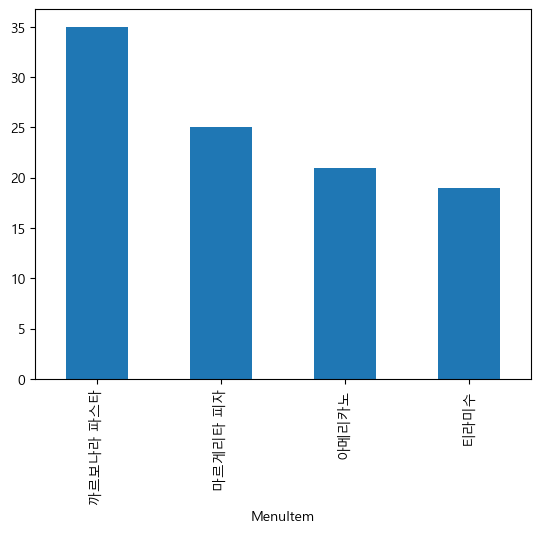

In [34]:
menu_sales.plot(kind='bar');

---
### 6. 글루텐 알레르기가 있는 고객이 먹을 수 없는 메뉴는 무엇인가요?
- `메뉴` 데이터에서 '알레르기 정보'를 정확히 해석하고 필터링해야 합니다.
---

In [35]:
# 6. 글루텐 알레르기가 있는 고객이 먹을 수 없는 메뉴는 무엇인가요?
menu_df[menu_df['알레르기 정보'].str.contains('글루텐')]

,메뉴명,카테고리,가격,재료,알레르기 정보
0,마르게리타 피자,피자,15000,"밀가루, 토마토, 치즈, 바질","글루텐, 유제품 포함"
1,까르보나라 파스타,파스타,18000,"파스타면, 베이컨, 계란, 치즈","글루텐, 계란, 유제품"


In [67]:
menu_df[menu_df['알레르기 정보'].str.contains('글루텐')]['메뉴명']

0     마르게리타 피자
1    까르보나라 파스타
Name: 메뉴명, dtype: object

---

### 7. 2024년 상반기(1~6월)에 긍정적인 리뷰(4점 이상)를 남긴 고객들이 가장 많이 주문한 메뉴 카테고리는 무엇인가요?

- (리뷰 필터링 → 고객 식별 → 해당 고객의 구매내역 조회 → 메뉴 카테고리별 집계)의 복잡한 절차가 필요합니다.

---

In [42]:
# 7. 2024년 상반기(1~6월)에 긍정적인 리뷰(4점 이상)를 남긴 고객들이 가장 많이 주문한 메뉴 카테고리는 무엇인가요?
review_df['Date'] = pd.to_datetime(review_df['Date'])
half_year = review_df[review_df['Date'].dt.to_period('M') <= '2024-06']
half_year_positive = half_year[half_year['Rating'] >= 4]
half_year_positive.head()

,Rating,Review,User,Date
0,4,분위기가 좋아서 데이트 장소로 딱입니다.,사용자17,2024-01-05
1,4,티라미수가 정말 부드럽고 맛있어요.,사용자27,2024-01-06
2,5,분위기가 좋아서 데이트 장소로 딱입니다.,사용자11,2024-01-07
3,4,커피가 진하고 맛있습니다.,사용자47,2024-01-07
4,4,조용하고 아늑해서 혼자 책 읽기 좋아요.,사용자45,2024-01-11


In [49]:
# half_year_positive에 있는 User들로 purchase_df에서 주문한 메뉴 카테고리 집계
positive_users = half_year_positive['User'].unique()
positive_users

array(['사용자17', '사용자27', '사용자11', '사용자47', '사용자45', '사용자44', '사용자32',
       '사용자35', '사용자8', '사용자12', '사용자19', '사용자9', '사용자43', '사용자15',
       '사용자31', '사용자46', '사용자13', '사용자2', '사용자36', '사용자14', '사용자37',
       '사용자34', '사용자49', '사용자3'], dtype=object)

In [99]:
sorted(positive_users)

['사용자11',
 '사용자12',
 '사용자13',
 '사용자14',
 '사용자15',
 '사용자17',
 '사용자19',
 '사용자2',
 '사용자27',
 '사용자3',
 '사용자31',
 '사용자32',
 '사용자34',
 '사용자35',
 '사용자36',
 '사용자37',
 '사용자43',
 '사용자44',
 '사용자45',
 '사용자46',
 '사용자47',
 '사용자49',
 '사용자8',
 '사용자9']

In [44]:
positive_purchases = purchase_df[purchase_df['User'].isin(positive_users)]
positive_purchases

,User,MenuItem,Quantity,PricePerUnit,TotalPrice,Date
11,사용자2,마르게리타 피자,1,15000,15000,2024-07-13
12,사용자2,마르게리타 피자,3,15000,45000,2024-07-29
13,사용자2,마르게리타 피자,2,15000,30000,2024-05-11
14,사용자2,아메리카노,1,5000,5000,2024-03-25
15,사용자2,까르보나라 파스타,2,18000,36000,2024-11-10
...,...,...,...,...,...,...
471,사용자49,아메리카노,1,5000,5000,2024-08-15
472,사용자49,아메리카노,2,5000,10000,2024-01-01
473,사용자49,마르게리타 피자,3,15000,45000,2024-10-23
474,사용자49,마르게리타 피자,1,15000,15000,2024-04-03


In [50]:
# 메뉴명과 카테고리별로 집계
menu_category_counts = positive_purchases.groupby('MenuItem')['Quantity'].sum().sort_values(ascending=False)
print(menu_category_counts)

MenuItem
까르보나라 파스타    139
마르게리타 피자     132
티라미수         119
아메리카노        108
Name: Quantity, dtype: int64


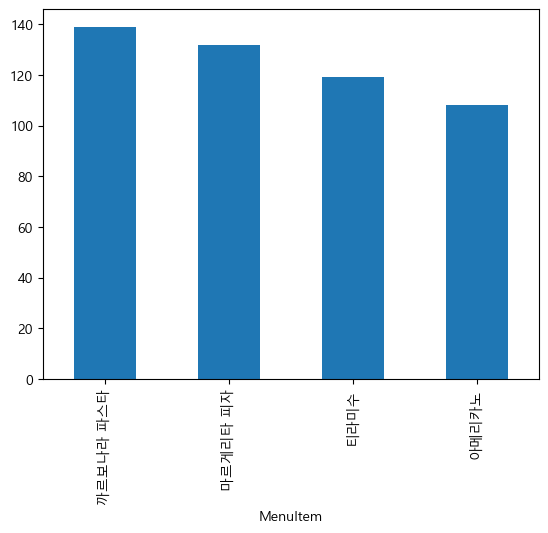

In [51]:
menu_category_counts.plot(kind='bar');

---

### 8. ‘가격’이라는 키워드가 포함된 리뷰들의 평균 평점은 얼마이며, 이 리뷰를 남긴 사용자들은 주로 어떤 메뉴를 주문했나요?

- 정성적 데이터(리뷰 텍스트)와 정량적 데이터(평점, 구매 내역)를 결합한 심층 분석이 필요합니다.

---

In [ ]:
# 8. ‘가격’이라는 키워드가 포함된 리뷰들의 평균 평점은 얼마이며, 이 리뷰를 남긴 사용자들은 주로 어떤 메뉴를 주문했나요?
review_price = review_df[review_df['Review'].str.contains('가격')]
review_price

,Rating,Review,User,Date
39,4,가격은 조금 비싸지만 서비스는 만족스러워요.,사용자43,2024-04-30
46,3,가격은 조금 비싸지만 서비스는 만족스러워요.,사용자6,2024-06-06
48,5,가격은 조금 비싸지만 서비스는 만족스러워요.,사용자45,2024-06-10
54,4,가격은 조금 비싸지만 서비스는 만족스러워요.,사용자28,2024-07-02
65,3,가격은 조금 비싸지만 서비스는 만족스러워요.,사용자12,2024-07-20
86,3,가격은 조금 비싸지만 서비스는 만족스러워요.,사용자14,2024-09-05
90,3,가격은 조금 비싸지만 서비스는 만족스러워요.,사용자4,2024-09-22
91,3,가격은 조금 비싸지만 서비스는 만족스러워요.,사용자34,2024-09-25


In [63]:
price_mean = review_price['Rating'].mean()
price_mean

np.float64(3.5)

In [64]:
review_price['User'].unique()

array(['사용자43', '사용자6', '사용자45', '사용자28', '사용자12', '사용자14', '사용자4',
       '사용자34'], dtype=object)

In [66]:
purchase_df[purchase_df['User'].isin(review_price['User'])]['MenuItem'].value_counts()

MenuItem
티라미수         21
아메리카노        20
까르보나라 파스타    18
마르게리타 피자     18
Name: count, dtype: int64